---
title: A356 Lab 1 — Overview & Review
subtitle: Probability, Statistics, and Scientific Visualization 
authors:
  - name: Earl Patrick Bellinger
    orcid: 0000-0003-4456-4863
    affiliations:
      - Department of Astronomy, Yale University
license: CC-BY-4.0
---

*tags*: `probability`, `statistics`, `data-visualization`, `advanced-undergrad`

## Learning Goals 

1. Refresher on basic probability: frequentist, Bayesian, Monte Carlo techniques 
2. Refresher on basic statistics: mean, variance, correlation, linear regression, coefficient of determination, distributions, central limit theorem
3. Refresher on parsing and visualizing data 
4. Have some fun with famous "paradoxes" in probability and statistics 

:::{note} 

You need `jupyterlab_myst` installed in order to properly view this notebook. If it is not already installed on your machine, you could do for example `!pip install jupyterlab-myst` in a notebook cell to install it, and then restart your kernel. 

Ensure that your visualizations adhere to good principles. I have supplied example plots; pay attention to details such as axis labels, axis ranges, and so on. **Bonus points** will be given if your plots are better than the examples :-) 

Finally, note that for this and all labs, turning in a notebook that throws an error and does not run through to the end will result in an incomplete. Rerun your notebook before submission (and periodically) by pressing the double arrows (`»`) button at the top of jupyter ("Restart the kernel and run all cells"). Note that when you re-run it, it will remove the example plots. It can therefore be helpful to download a second copy of the lab for reference. 

:::{note} AI Assistance

Usage of ChatGPT (and similar tools) is allowed and encouraged in this course. I only ask that you provide links to your transcripts (`Share chat` in the upper-right corner) so that I can give feedback to help improve your usage. Also, it will of course be preferable if you use it as an assistant, and not have it do the entire problem for you. At the bottom of this notebook is a cell for you to paste your transcript; feel encouraged to include multiple links if you use more than one session. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from scipy import stats
import math

np.random.seed(4) # chosen by fair dice roll

In [2]:
# some statements to make the figures look nicer 
%config InlineBackend.figure_format='retina'
plt.rcParams.update({'axes.linewidth' : 1,
                     'ytick.major.width' : 1,
                     'ytick.minor.width' : 1,
                     'xtick.major.width' : 1,
                     'xtick.minor.width' : 1,
                     'xtick.labelsize': 10, 
                     'ytick.labelsize': 10,
                     'axes.labelsize': 12,
                     'font.family': 'Serif',
                     'figure.figsize': (10, 6)
                    })

:::{tip} Exercise 1: Birthday Problem

You are at a conference with $N$ astronomers. What is the probability $P(N)$ that at least two will share a birthday? (Assume there are 365 days in a year and ignore leap years, twins, seasonal variations in birth rate, etc.). 

1. Write a function to compute the $P(N)$ analytically. 
2. Write a function to do 100 Monte Carlo simulations to determine $P(N)$ numerically, and its associated uncertainty. 
3. Plot the results. Use a solid line for the analytical results, and points with error bars for the numerical results. Add a horizontal line at a probability of 50%.
4. How many astronomers need to be present for it to be more likely than not that at least one pair has the same birthday? How many astronomers need to be present for it to be guaranteed that at least one pair has the same birthday?  

:::{note} Hints
:class: dropdown

Analytical derivation
---

Each of the $N$ people can have any of the 365 days as their birthday. Hence, the total number of possible birthday assignments is $365^N$. 

We will begin by calculating the probability that no two people share a birthday. The first person can have any of the 365 days as their birthday, the second person can have any of the remaining 364 days, the third person can have any of the remaining 363 days, and so on. Therefore, the number of ways to assign birthdays such that no two people share the same birthday is:

$$365 \times 364 \times 363 \times \cdots \times (365 - N + 1).$$

The probability $P_{\textrm{unique}}$ that no two people share a birthday is the ratio of the number of ways to assign birthdays such that no two people share the same birthday to the total number of possible birthday assignments:

$$P_{\textrm{unique}}(N) = \frac{365 \times 364 \times 363 \times \cdots \times (365 - N + 1)}{365^N}$$
$$= \frac{365!}{(365 - N)! \times 365^N}$$
$$= \prod_{i=0}^{N-1} \left( 1 - \frac{i}{365} \right).$$

The probability $P$ that at least two people share a birthday is the complement of the probability that no two people share a birthday: $P(N) = 1 - P_{\textrm{unique}}(N)$.

Hint: $P(5) = 0.02713557369979347$. 


Numerical considerations
---

For each Monte Carlo simulation, you can generate a random set of birthdays for the $N$ astronomers using `np.random.randint(0, 365, N)` and check whether at least two share a birthday. For each value of $N$ you will do 100 iterations and then check what fraction of times you found at least one matching pair. 

Each Monte Carlo simulation can be considered as a Bernoulli trial with two possible outcomes:
1. Success (at least two people share a birthday), with probability $P$.
2. Failure (no shared birthdays), with probability $1 - P$.

The variance of a Bernoulli random variable $X$ is given by $\text{Var}(X) = P(1 - P)$.

When we perform $K$ independent simulations, the distribution of the sample mean (our Monte Carlo estimate) has a standard error given by:

$$\text{SE}(K) = \sqrt{\frac{\text{Var}(X)}{K}} = \sqrt{\frac{P(1 - P)}{K}}.$$

Hint: For $K=5$, we have $\text{SE}(100) \simeq 0.015$, but note that this estimate will vary! 

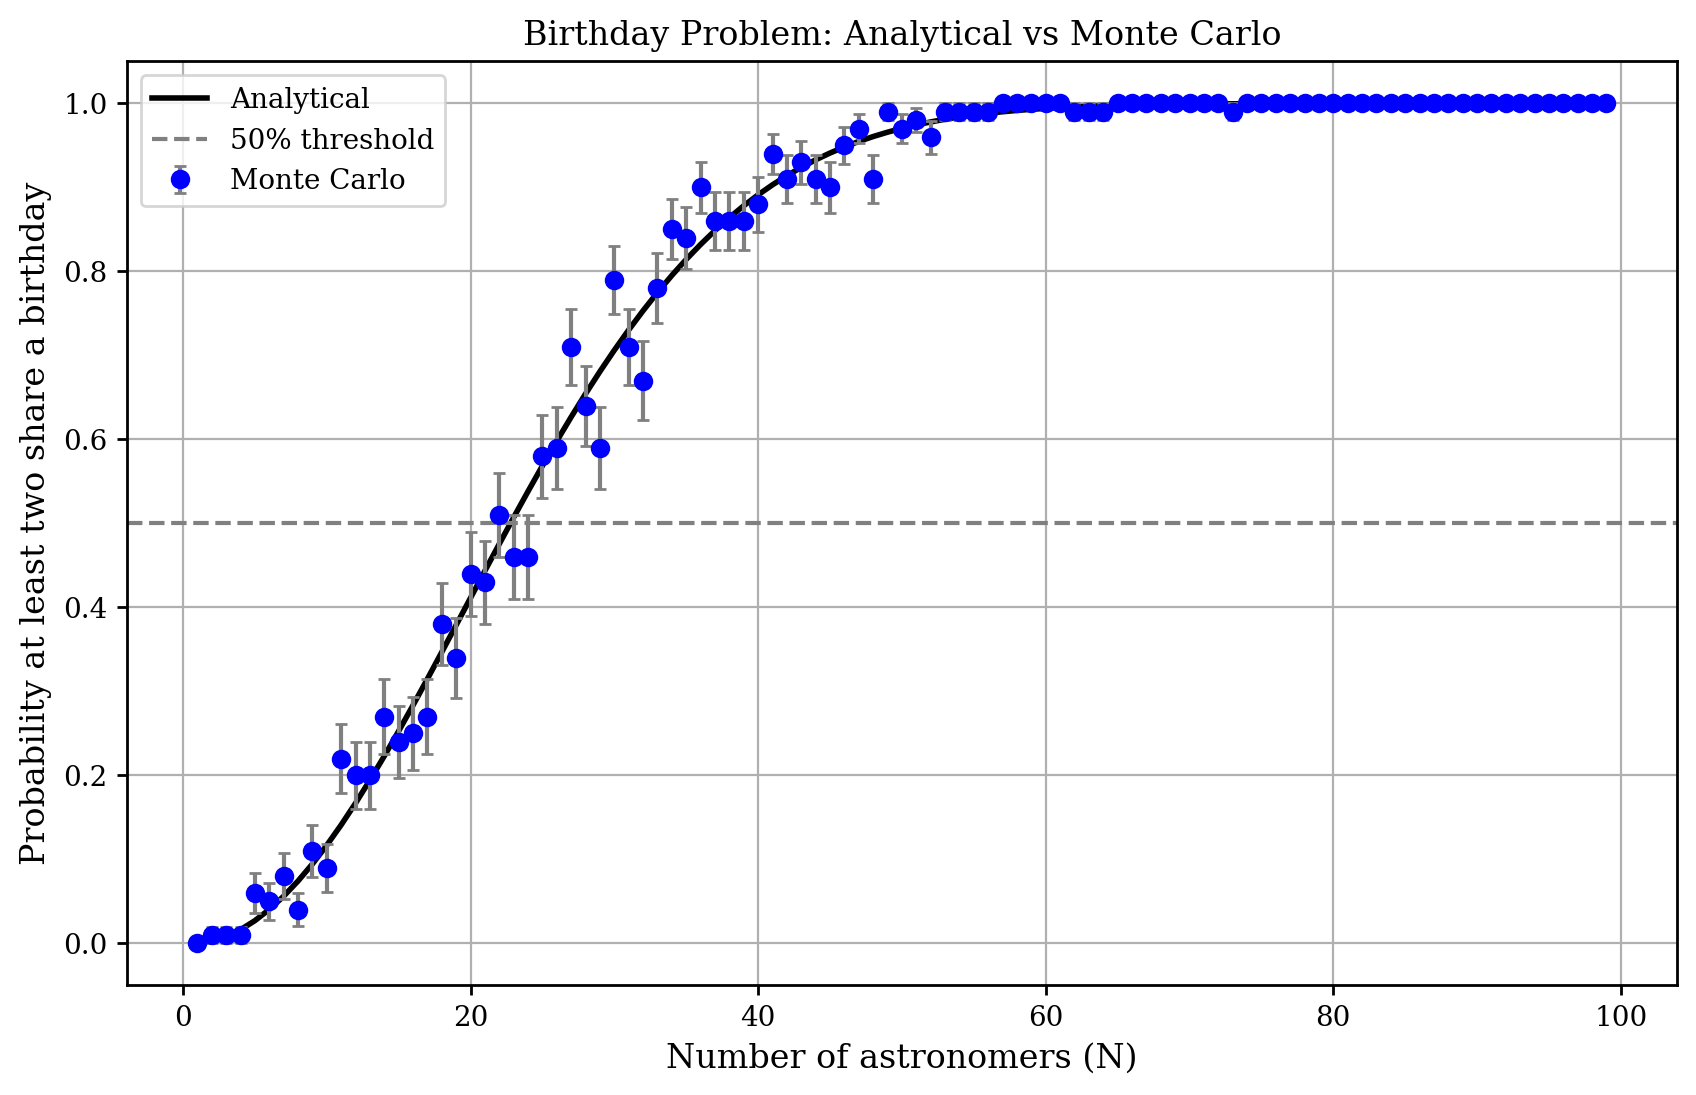

Minimum N for >50% chance: 23
Minimum N for guaranteed shared birthday: 366


In [3]:
## Code

# 1. Analytical probability function
def birthday_prob_analytical(N):
    if N < 2:
        return 0.0
    prob_unique = 1.0
    for i in range(N):
        prob_unique *= (365 - i) / 365
    return 1 - prob_unique

# 2. Monte Carlo simulation
def birthday_prob_mc(N, K=100):
    count = 0
    for _ in range(K):
        bdays = np.random.randint(0, 365, N)
        if len(set(bdays)) < N:
            count += 1
    return count / K

# 3. Plot analytical and MC results, with error bars
N_values = np.arange(1, 100)
analytical = [birthday_prob_analytical(N) for N in N_values]
mc = [birthday_prob_mc(N, K=100) for N in N_values]
mc_err = [np.sqrt(p * (1 - p) / 100) for p in mc]

plt.figure(figsize=(10,6))
plt.plot(N_values, analytical, label='Analytical', lw=2, color = "black")
plt.errorbar(N_values, mc, yerr=mc_err, fmt='o', capsize=2, color = "blue", ecolor="grey", label='Monte Carlo', alpha=1)
plt.axhline(0.5, color='gray', ls='--', label='50% threshold')
plt.xlabel('Number of astronomers (N)')
plt.ylabel('Probability at least two share a birthday')
plt.title('Birthday Problem: Analytical vs Monte Carlo')
plt.legend()
plt.grid(True)
plt.show()

# 4. Find N for probability > 0.5 and N for probability = 1
N_more_likely = next(N for N, p in zip(N_values, analytical) if p > 0.5)
N_guaranteed = 366  # With 366 people, pigeonhole principle guarantees a shared birthday
print(f"Minimum N for >50% chance: {N_more_likely}")
print(f"Minimum N for guaranteed shared birthday: {N_guaranteed}")

:::{tip} Exercise 1 Extra Credit

Plot the standard error of the Monte Carlo simulations for $P(5)$, $P(10)$, and $P(15)$ as a function of the number of simulations performed. How many simulations are required to achieve an uncertainty of $10^{-3}$? 

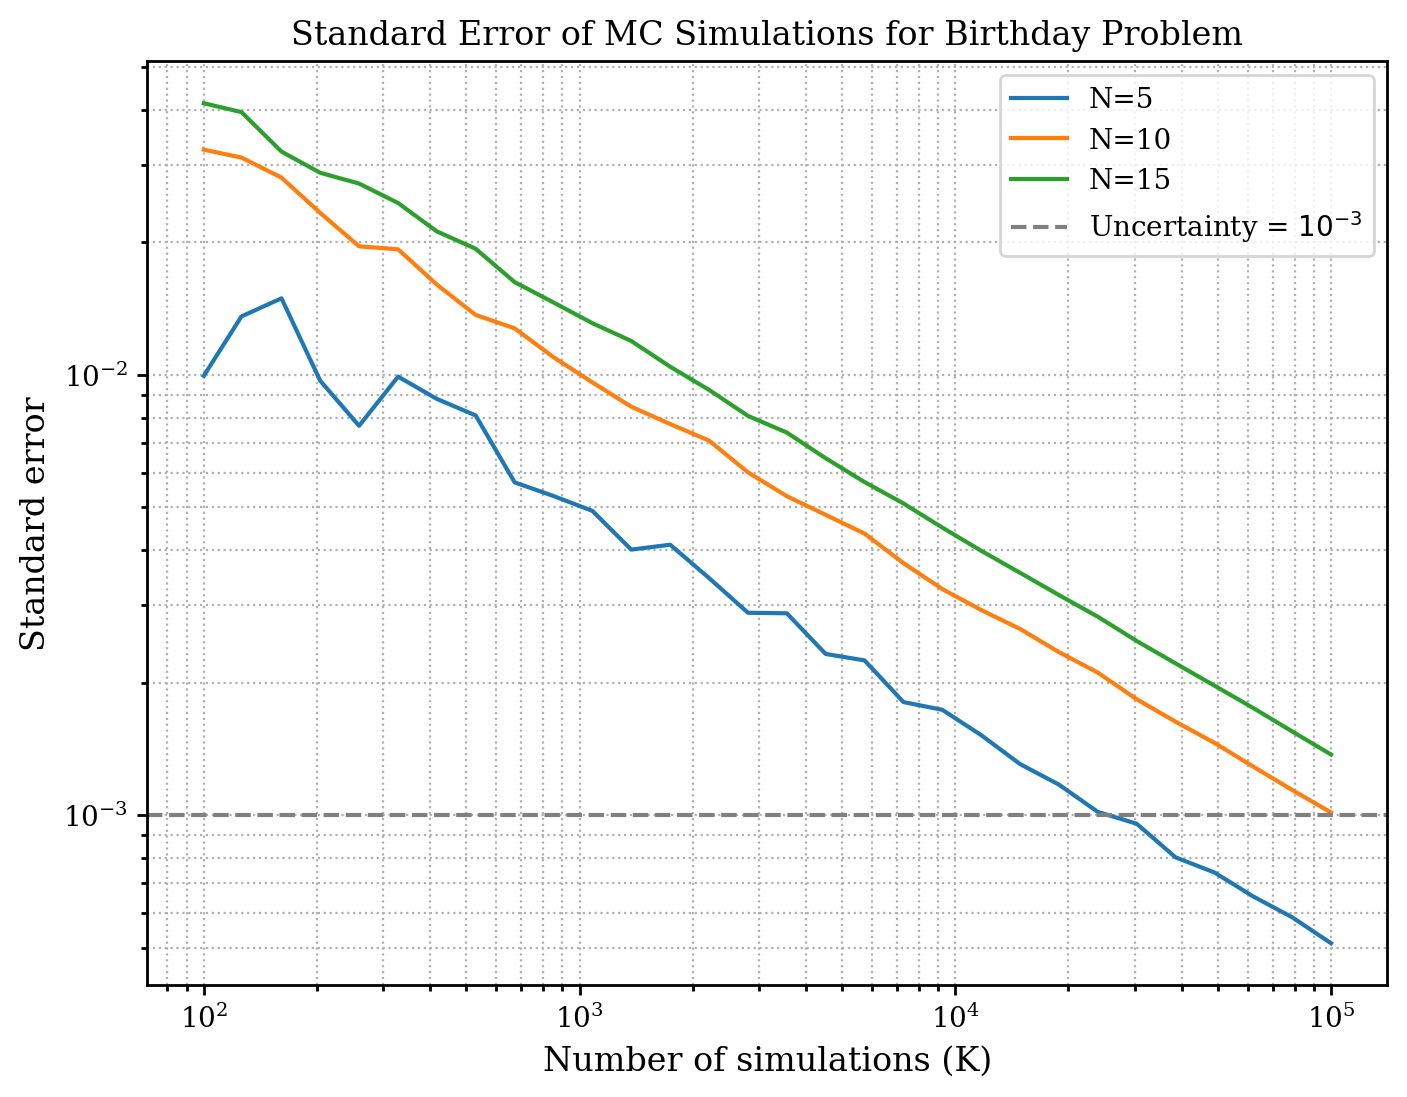

N=5: Need at least 30391 simulations for uncertainty < 1e-3


In [4]:
## Extra credit code here 

N_values = [5, 10, 15]
K_values = np.logspace(2, 5, num=30, dtype=int)  # From 100 to 100,000
std_errors = {N: [] for N in N_values}
probs = {N: [] for N in N_values}

for N in N_values:
    for K in K_values:
        # MC estimate
        count = 0
        for _ in range(K):
            bdays = np.random.randint(0, 365, N)
            if len(set(bdays)) < N:
                count += 1
        p = count / K
        se = np.sqrt(p * (1 - p) / K)
        std_errors[N].append(se)
        probs[N].append(p)

plt.figure(figsize=(8,6))
for N in N_values:
    plt.plot(K_values, std_errors[N], label=f'N={N}')
plt.axhline(1e-3, color='gray', ls='--', label='Uncertainty = $10^{-3}$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of simulations (K)')
plt.ylabel('Standard error')
plt.title('Standard Error of MC Simulations for Birthday Problem')
plt.legend()
plt.grid(True, which='both', ls=':')
plt.show()

# How many simulations needed for uncertainty < 1e-3?
for N in N_values:
    for K, se in zip(K_values, std_errors[N]):
        if se < 1e-3:
            print(f'N={N}: Need at least {K} simulations for uncertainty < 1e-3')
            break

:::{tip} Exercise 2: Monty Hall Problem

Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a telescope; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice? 

First, think about the problem, and write down your initial guess based on your intuition. 

Then, write a simulation in python to determine the answer. Although goats are great, assume you want to win the telescope. 

:::{note} Hints 
:class: dropdown

The three doors can be represented by three integers (0, 1, 2). In each round of the simulation, you can use `random.randint` to determine your initial choice and the position of the telescope. Then randomly pick from the integers that doesn't belong to either of those -- that is the door opened by the host. Finally, randomly pick an integer that isn't your initial choice and wasn't just opened by the host -- this is the door you may choose to switch to. Count how many times switching wins and loses, and divide by the number of simulations you run to get the probabilities. 

In [5]:
## Your code here 

### Initial Guess ###
# Okay so I'm pretty sure I've heard of this problem before 
# and I believe that the correct answer is to switch. Basically,
# you write out all the possible outcomes and see that switching
# gives you a 2/3 chance of winning instead of 1/3.


# Number of simulations
n_simulations = 10000
switch_wins = 0
stay_wins = 0

for _ in range(n_simulations):
    # Randomly place the telescope
    telescope = random.randint(0, 2)
    # Contestant's initial choice
    initial_choice = random.randint(0, 2)
    # Host opens a door with a goat (not the telescope, not the initial choice)
    doors = [0, 1, 2]
    possible_doors = [door for door in doors if door != initial_choice and door != telescope]
    host_opens = random.choice(possible_doors)
    # If contestant switches, they pick the remaining unopened door
    switch_choice = [door for door in doors if door != initial_choice and door != host_opens][0]
    # Track wins
    if switch_choice == telescope:
        switch_wins += 1
    if initial_choice == telescope:
        stay_wins += 1

print(f"Probability of winning if you switch: {switch_wins / n_simulations:.3f}")
print(f"Probability of winning if you stay: {stay_wins / n_simulations:.3f}")

Probability of winning if you switch: 0.668
Probability of winning if you stay: 0.332


:::{tip} Exercise 3: Coin Flip Problem 

A professor flips a coin $N$ times, and it comes up heads every time. After how many coin flips do you have a more than 50% belief that it is a trick coin? Assume you initially have a 99% belief that the coin is fair. Write a simulation that prints your belief after each coin flip, and stops when you are more certain than not that the coin isn't fair. 

:::{note} Hints
:class: dropdown

Given:
\begin{align*}
    p_F &= 0.5 \quad \text{(probability of heads for a fair coin)} \\
    p_T &= 1.0 \quad \text{(probability of heads for a trick coin)} \\
    P(F) &= 0.99 \quad \text{(initial belief that the coin is fair)} \\
    P(T) &= 0.01 \quad \text{(initial belief that the coin is a trick coin)}
\end{align*}

After observing $N$ heads, we update our belief using Bayes' theorem:

\begin{align*}
    P(\rm{Hypothesis}|\rm{Data}) 
    &= 
    \frac{
        \rm{Likelihood} \cdot \rm{Prior}
    }{
        \rm{Evidence}
    } \\
    &= 
    \frac{
        P(\rm{Data}|\rm{Hypothesis}) 
        \cdot 
        P(\rm{Hypothesis})
    }{
        P(\rm{Data}|\rm{Hypothesis}) 
        \cdot 
        P(\rm{Hypothesis}) 
        + 
        P(\rm{Data}|\rm{Alternative}) 
        \cdot P
        (\rm{Alternative})
    }
\end{align*}

and hence

$$P(F|N) = \frac{P(N|F) \cdot P(F)}{P(N|F) \cdot P(F) + P(N|T) \cdot P(T)}$$
where
$$P(N|F) = (p_F)^N \quad \text{and} \quad P(N|T) = p_T.$$

We are looking for the smallest $N$ such that $P(F|N) \leq 0.5$.

Hint: You can use a `while True` loop, and break when `P_F_given_N <= 0.5`. _N <= 0.5`. 

In [6]:
## Your code here 

p_F = 0.5   # Probability of heads for a fair coin
p_T = 1.0   # Probability of heads for a trick coin
P_F = 0.99  # Initial belief that the coin is fair
P_T = 0.01  # Initial belief that the coin is a trick coin

N = 0
while True:
    N += 1
    # Likelihoods
    P_N_given_F = p_F ** N
    P_N_given_T = p_T
    # Bayes' theorem
    P_F_given_N = (P_N_given_F * P_F) / (P_N_given_F * P_F + P_N_given_T * P_T)
    print(f"After {N} heads: Belief coin is fair = {P_F_given_N:.4f}")
    if P_F_given_N <= 0.5:
        print(f"\nAfter {N} heads, belief that the coin is fair drops below 50%.")
        break

After 1 heads: Belief coin is fair = 0.9802
After 2 heads: Belief coin is fair = 0.9612
After 3 heads: Belief coin is fair = 0.9252
After 4 heads: Belief coin is fair = 0.8609
After 5 heads: Belief coin is fair = 0.7557
After 6 heads: Belief coin is fair = 0.6074
After 7 heads: Belief coin is fair = 0.4361

After 7 heads, belief that the coin is fair drops below 50%.


:::{tip} Exercise 4: Anscombe's Quartet

Available on canvas is `anscombe.csv`, a data set that has been engineered by statistician Frank Anscombe to demonstrate that summary statistics can be misleading, and to show the value of (always!) visualizing data. 

1. Load the data (e.g. using `pd.read_csv`). 
2. Calculate the means and sample variances of all the columns. *Hint*: `pandas` and `numpy` alike have `mean()` and `var()` functions.
3. Calculate the correlation coefficient between x and y for all four pairs. *Hint*: `scipy.stats.pearsonr`. You may want to figure out a way to do this in a loop, to avoid excessive code duplication. For example, you can do `for ii in range(1, 5):` and then obtain `df[f'x{ii}']` 
4. Calculate the linear regression slope and intercept for all four pairs, and the coefficient of determination. *Hint*: `scipy.stats.linregress`
6. Plot all four x,y pairs, and include the line of best fit. Write a sentence describing the visualization and contrasting it with the above summary statistics.  

:::{note} Reminder
:class: dropdown

\begin{align*}
\textrm{sample mean:} & \qquad \mu = \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i \\
\textrm{sample variance:} & \qquad \sigma^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \mu)^2 \\
\textrm{correlation coefficient:} & \qquad r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}} \\
\textrm{linear slope:} & \qquad b_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2} \\
\textrm{linear intercept:} & \qquad b_0 = \bar{y} - b_1 \bar{x} \\
\textrm{coefficient of determination:} & \qquad R^2 = \left( \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}} \right)^2
\end{align*}


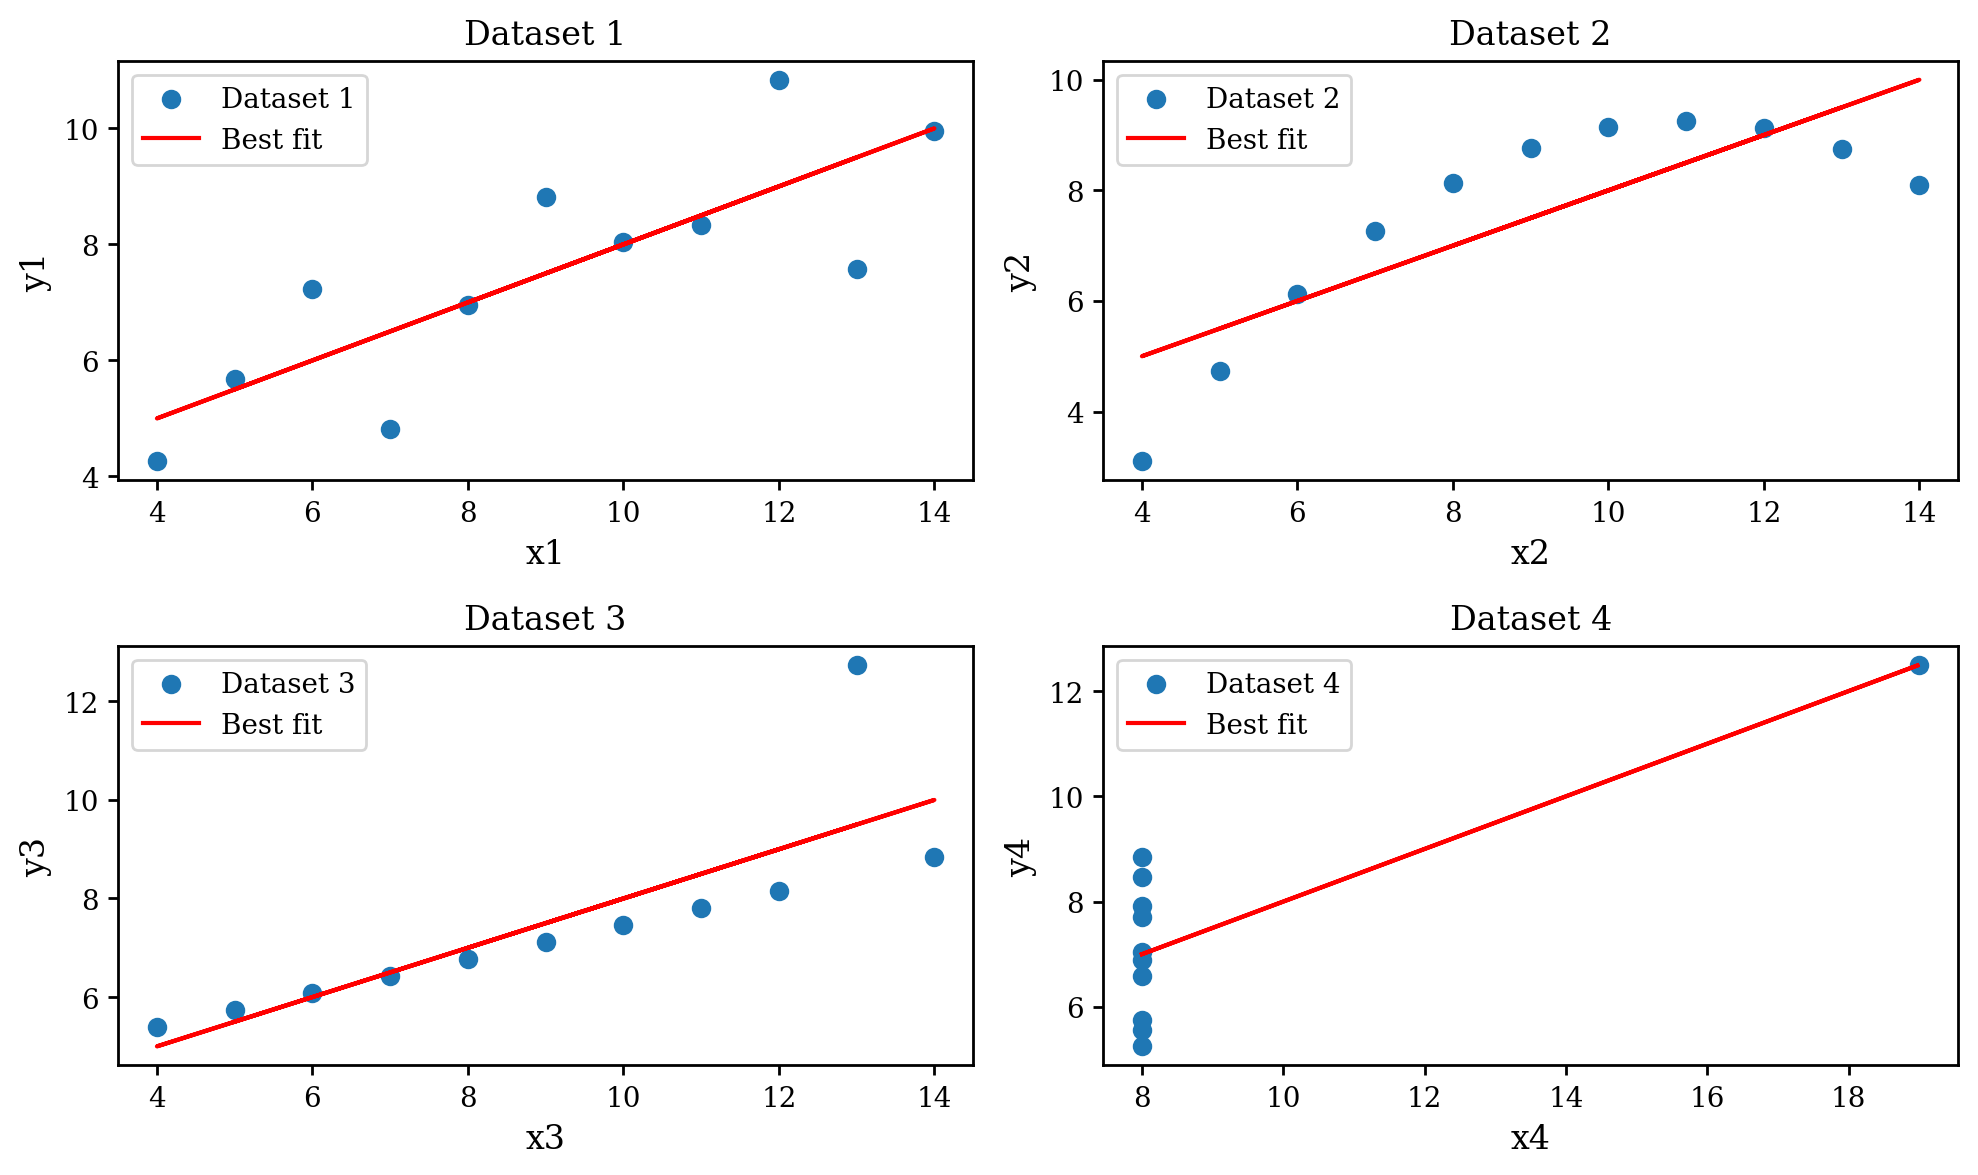

Dataset 1:
  mean_x = 9.00, mean_y = 7.50
  var_x = 11.00, var_y = 4.13
  correlation = 0.82
  slope = 0.50, intercept = 3.00
  R^2 = 0.67

Dataset 2:
  mean_x = 9.00, mean_y = 7.50
  var_x = 11.00, var_y = 4.13
  correlation = 0.82
  slope = 0.50, intercept = 3.00
  R^2 = 0.67

Dataset 3:
  mean_x = 9.00, mean_y = 7.50
  var_x = 11.00, var_y = 4.12
  correlation = 0.82
  slope = 0.50, intercept = 3.00
  R^2 = 0.67

Dataset 4:
  mean_x = 9.00, mean_y = 7.50
  var_x = 11.00, var_y = 4.12
  correlation = 0.82
  slope = 0.50, intercept = 3.00
  R^2 = 0.67

Although the summary statistics are basically the same, the visualizations show how different the datasets truly are. As we talked about in class, this is why data visualization is so important.


In [7]:
## Your code here 

from scipy.stats import pearsonr, linregress

df = pd.read_csv("anscombe.csv")

results = []

# Loop through each section
for i in range(1, 5):
    x = df[f'x{i}']
    y = df[f'y{i}']
    mean_x = x.mean()
    mean_y = y.mean()
    var_x = x.var(ddof=1)
    var_y = y.var(ddof=1)
    corr, _ = pearsonr(x, y)
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    r2 = r_value ** 2
    results.append({
        'mean_x': mean_x, 'mean_y': mean_y,
        'var_x': var_x, 'var_y': var_y,
        'corr': corr, 'slope': slope,
        'intercept': intercept, 'r2': r2
    })
    # Plot
    plt.subplot(2, 2, i)
    plt.scatter(x, y, label=f'Dataset {i}')
    plt.plot(x, slope * x + intercept, color='red', label='Best fit')
    plt.title(f'Dataset {i}')
    plt.xlabel(f'x{i}')
    plt.ylabel(f'y{i}')
    plt.legend()

plt.tight_layout()
plt.show()

# Print summary statistics
for i, res in enumerate(results, 1):
    print(f"Dataset {i}:")
    print(f"  mean_x = {res['mean_x']:.2f}, mean_y = {res['mean_y']:.2f}")
    print(f"  var_x = {res['var_x']:.2f}, var_y = {res['var_y']:.2f}")
    print(f"  correlation = {res['corr']:.2f}")
    print(f"  slope = {res['slope']:.2f}, intercept = {res['intercept']:.2f}")
    print(f"  R^2 = {res['r2']:.2f}\n")

print("Although the summary statistics are basically the same, the visualizations show how different the datasets truly are. "\
      "As we talked about in class, this is why data visualization is so important.")

:::{tip} Exercise 5: Super Supernova Astrostats 

Supernovae are rare, explosive events in galaxies that occur approximately twice per century. Yet the last supernova seen in the Milky Way was 420 years ago — Kepler's Supernova in 1604. The number of supernovae observed in a galaxy over a fixed period can be modeled as a Poisson process. 

1. Run 100000 simulations (`np.random.poisson`) to count how many stars explode over a timespan of 420 years, and plot it as a histogram. Put $1\sigma$ yerrorbars on the histogram bins. Plot also the analytical relation. 
2. Based on those results, what is the probability that we have gone so long without a galactic supernova? 
3. Given that there has been no galactic supernova in the past 420 years, calculate the probability that a galactic supernova will occur in the next year.
4. Much of the Milky Way is obscured by dust, so there is only about a 30% chance that a galactic supernova is visible to the naked eye. Assume you will live another 100 years. What is the probability you will see at least one supernova? How many (mean and standard deviation) galactic supernova can you expect to see?

:::{note} Hints
:class: dropdown

The Poisson distribution is useful for modeling the number of events $k$ that occur in a fixed interval of time or space if these events happen with a known constant mean rate $\lambda$ and are independent of the time since the last event. 

The probability mass function (PMF) of a Poisson distributed random variable $X$ is given by:
$$P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}.$$

For the supernova problem, the rate parameter $\lambda$ is calculated by multiplying the rate of supernovae per year by the number of years. Note that `scipy` provides `stats.poisson.pmf` for calculating $P(X=k)$, though note that unlike `np.random.poisson` they use the symbol $\mu$ instead of $\lambda$. The standard deviation is given by $\sqrt{\lambda}$, or one can use `stats.poisson.std`, but that's actually more characters than simply `np.sqrt`. And as before, the standard deviation for the Monte Carlo simulations is the square root of the counts divided by the number of simulations. 

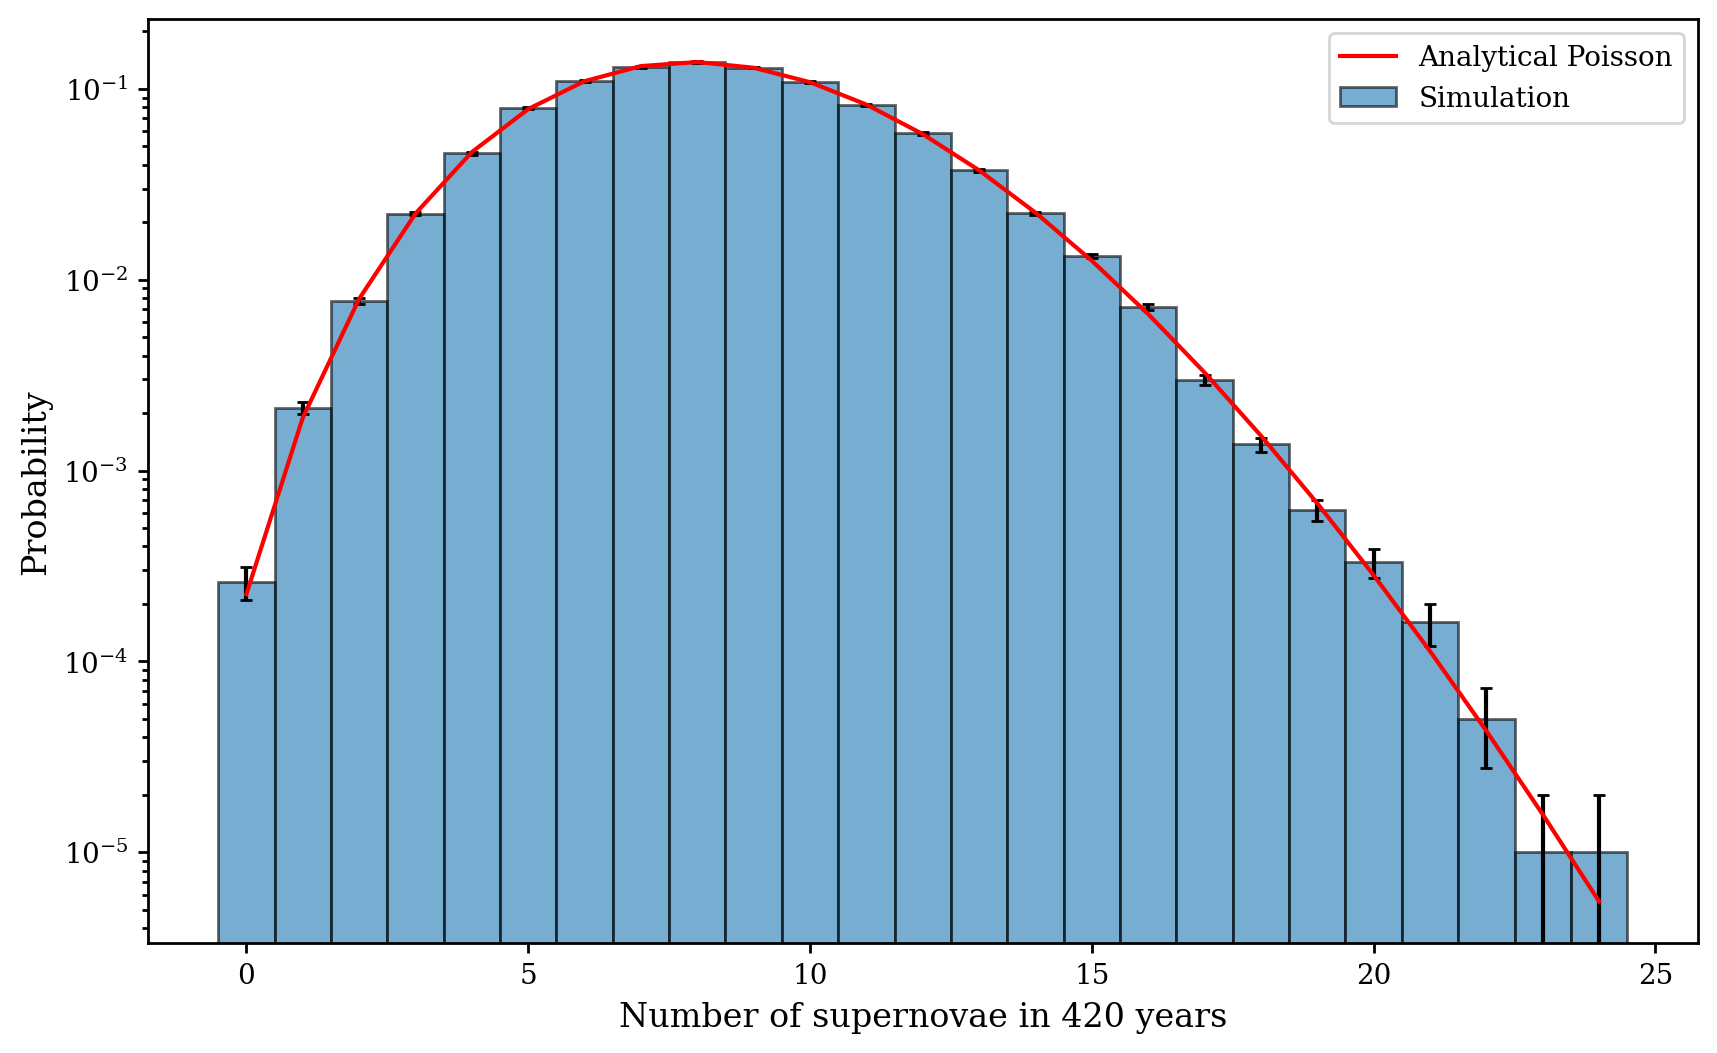

Probability of zero supernovae in 420 years: 2.2487e-04
Probability of at least one supernova in next year: 0.0198
Probability of seeing at least one supernova in 100 years: 0.4512
Expected number of visible supernovae: mean = 0.60, std = 0.77


In [8]:
## Your code here
from scipy.stats import poisson

# 1. Simulate supernovae over 420 years
rate_per_year = 2 / 100  # 2 per century
years = 420
lmbda = rate_per_year * years
n_sim = 100000
simulated = np.random.poisson(lmbda, n_sim)

# Histogram with 1σ error bars
counts, bins = np.histogram(simulated, bins=np.arange(simulated.min(), simulated.max()+2)-0.5)
bin_centers = (bins[:-1] + bins[1:]) / 2
errors = np.sqrt(counts)
plt.bar(bin_centers, counts/n_sim, width=1, alpha=0.6, label='Simulation', edgecolor='black')
plt.errorbar(bin_centers, counts/n_sim, yerr=errors/n_sim, fmt='none', ecolor='black', capsize=2)

# Analytical Poisson PMF
k_vals = np.arange(simulated.min(), simulated.max()+1)
pmf = poisson.pmf(k_vals, lmbda)
plt.plot(k_vals, pmf, 'r-', label='Analytical Poisson')

plt.xlabel('Number of supernovae in 420 years')
plt.ylabel('Probability')
plt.yscale('log')
plt.legend()
plt.show()

# 2. Probability of zero supernovae in 420 years
prob_zero = poisson.pmf(0, lmbda)
print(f"Probability of zero supernovae in 420 years: {prob_zero:.4e}")

# 3. Probability of a supernova in the next year (given none in 420 years)
prob_next_year = 1 - poisson.pmf(0, rate_per_year)
print(f"Probability of at least one supernova in next year: {prob_next_year:.4f}")

# 4. Probability of seeing at least one naked-eye supernova in 100 years
visible_rate = rate_per_year * 0.3  # 30% chance visible
lmbda_visible = visible_rate * 100
prob_at_least_one = 1 - poisson.pmf(0, lmbda_visible)
mean_visible = lmbda_visible
std_visible = np.sqrt(lmbda_visible)
print(f"Probability of seeing at least one supernova in 100 years: {prob_at_least_one:.4f}")
print(f"Expected number of visible supernovae: mean = {mean_visible:.2f}, std = {std_visible:.2f}")

:::{tip} Exercise 5 Extra Credit

Plot the distribution of how many naked-eye supernova will be visible in the next 100 years, computed both analytically (`stats.poisson.pmf`) and numerically (`np.random.poisson`). 

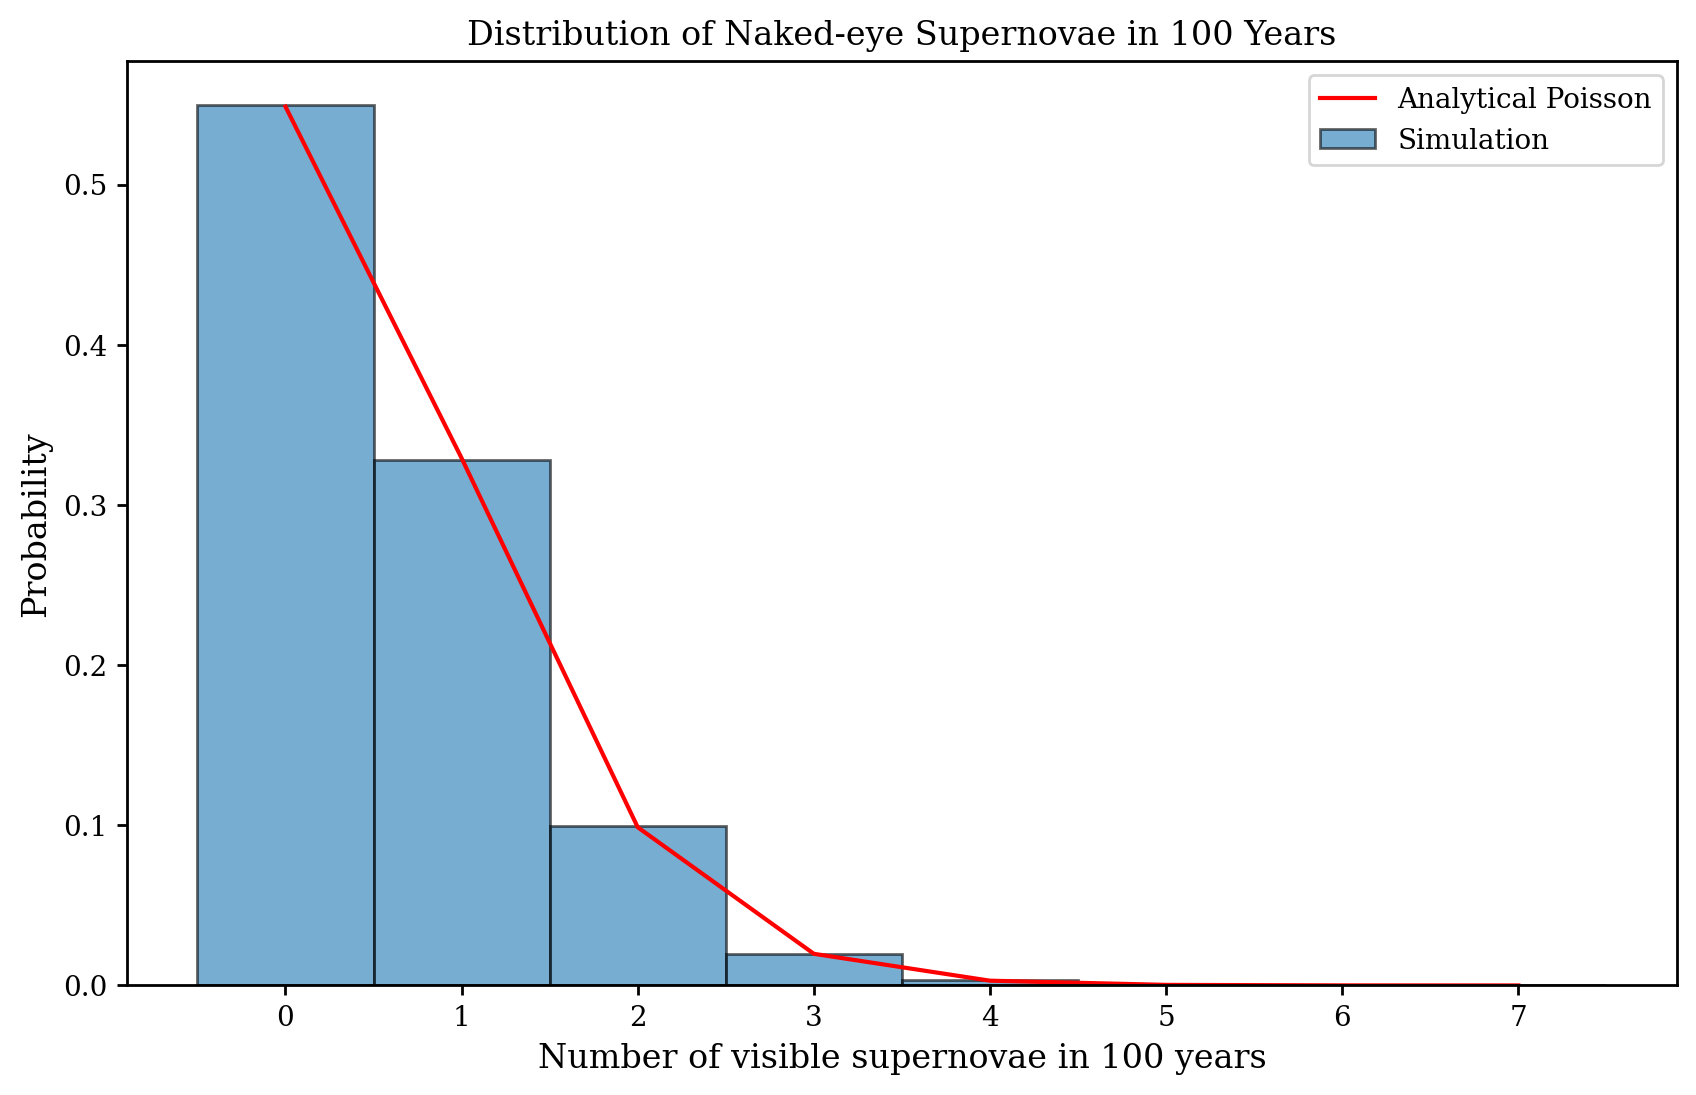

In [9]:
## Extra credit code here 

# Parameters for naked-eye supernovae in 100 years
rate_per_year = 2 / 100  # 2 per century
visible_rate = rate_per_year * 0.3  # 30% chance visible
lmbda_visible = visible_rate * 100
n_sim = 100000

# Numerical simulation
simulated_visible = np.random.poisson(lmbda_visible, n_sim)
counts, bins = np.histogram(simulated_visible, bins=np.arange(simulated_visible.min(), simulated_visible.max()+2)-0.5)
bin_centers = (bins[:-1] + bins[1:]) / 2
plt.bar(bin_centers, counts/n_sim, width=1, alpha=0.6, label='Simulation', edgecolor='black')

# Analytical Poisson PMF
k_vals = np.arange(simulated_visible.min(), simulated_visible.max()+1)
pmf = poisson.pmf(k_vals, lmbda_visible)
plt.plot(k_vals, pmf, 'r-', label='Analytical Poisson')

plt.xlabel('Number of visible supernovae in 100 years')
plt.ylabel('Probability')
plt.title('Distribution of Naked-eye Supernovae in 100 Years')
plt.legend()
plt.show()

:::{tip} Extra Credit: Sunrise Problem

1. What is the probability the Sun will rise tomorrow? 

2. A wealthy person wants to bet you that the Sun will rise tomorrow. If it does rise, you give them \$1. If it doesn't, they give you \$$N$. How large would $N$ need to be for you to take the bet (e.g., to make your expected winnings positive)? 

In [10]:
## Code

# Right off the bat, I expect N to be really large because I expect the probability that the sun rises tomorrow to be extremely close to 1.


# 1. Probability the Sun will rise tomorrow (Laplace's Rule of Succession)
# If the Sun has risen every day for k days, probability it rises tomorrow:
k = 4_500_000_000 * 365  # Approximate number of days Sun has risen (age of Sun in days)
P_sunrise = (k + 1) / (k + 2)
print(f"Probability the Sun will rise tomorrow: {P_sunrise:.20f}")

# 2. Minimum N for positive expected winnings
# Expected value: E = P_sunrise*(-1) + (1-P_sunrise)*N > 0
# Solve for N: N > P_sunrise / (1 - P_sunrise)
N_min = P_sunrise / (1 - P_sunrise)
print(f"Minimum N for positive expected winnings: {N_min:.0f}")

Probability the Sun will rise tomorrow: 0.99999999999939115369
Minimum N for positive expected winnings: 1642450629966


### Another extra credit mentioned in class: Do something with the central limit theorem (maybe vary size of n and see how CLT manifests itself)

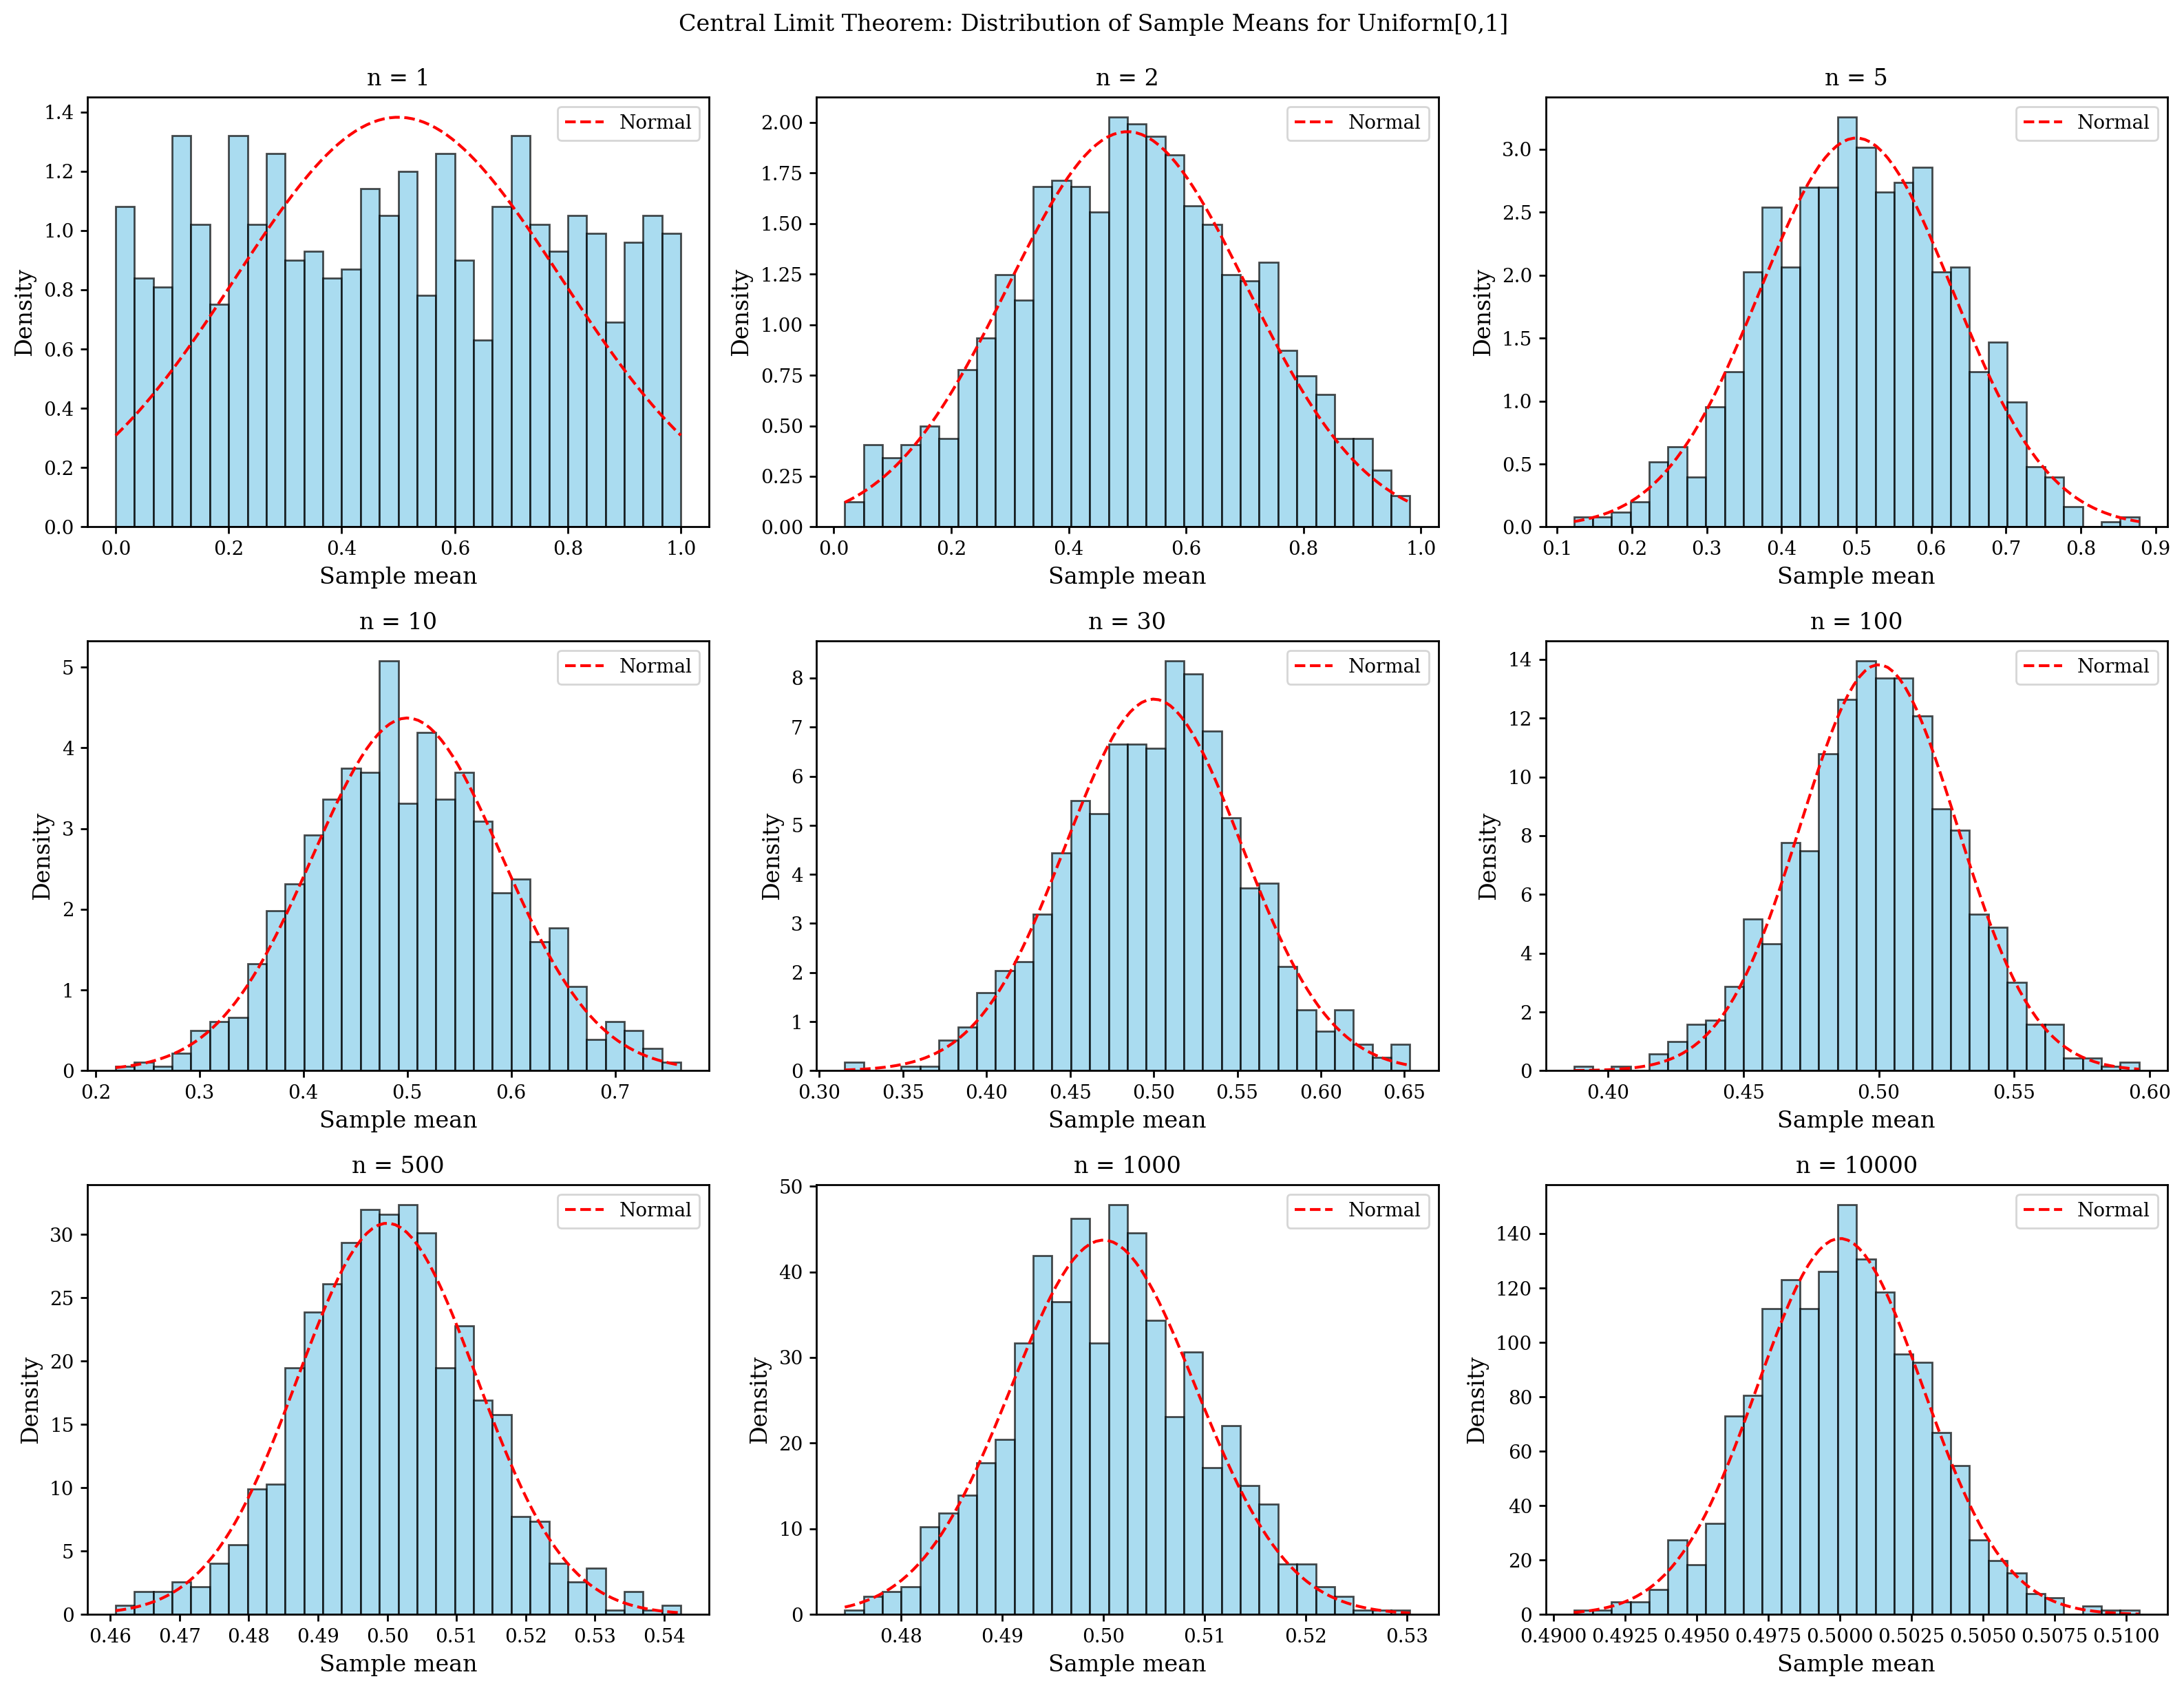

In [11]:
# Central Limit Theorem demonstration: Wider range of n values
n_values = [1, 2, 5, 10, 30, 100, 500, 1000, 10000]
n_samples = 1000  # Number of samples for each n

plt.figure(figsize=(16, 12))
for i, n in enumerate(n_values, 1):
    sample_means = [np.mean(np.random.uniform(0, 1, n)) for _ in range(n_samples)]
    plt.subplot(3, 3, i)
    plt.hist(sample_means, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title(f'n = {n}')
    plt.xlabel('Sample mean')
    plt.ylabel('Density')
    mu = 0.5
    sigma = np.sqrt(1/12/n)
    x = np.linspace(min(sample_means), max(sample_means), 100)
    plt.plot(x, 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2)), 'r--', label='Normal')
    plt.legend()

plt.tight_layout()
plt.suptitle('Central Limit Theorem: Distribution of Sample Means for Uniform[0,1]', y=1.02)
plt.show()

ChatGPT link: 

Was trying to ask it how to get the histograms with the edgecolors and gave it a picture, and now I can't share the chat...